In [1]:
#----------------------------
# make Attention ! 
#----------------------------


#----------------------------
# idea 
# attention 자체는, global feature 에 대한 local feature 들의 상관관계 score 를 local feature 들에 반영해 주는 것. 
# self-attention 이면은 feature 자체에 대한 transform, cross-attention 이면은 query 에다가 query * key 결과 matrix (value) 를 concat => need to be checked  
#
# image classification layer 위에다가 쌓았을 때, global feature 를 반영하는 last feature maps 들을 만들고 학습 결과 향상 확인 
#----------------------------


import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = torchvision.datasets.STL10(root="/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/00.Data/torchvision_data_sets",split="train", download=True)

Files already downloaded and verified


In [3]:
original_img = np.asarray( data.__getitem__(1)[0] )

In [4]:
original_img.shape

(96, 96, 3)

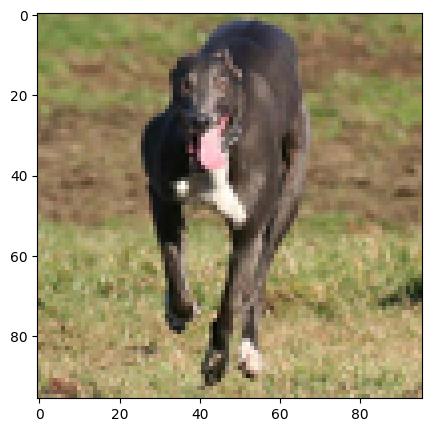

In [5]:
plt.figure(figsize=(5,5))
plt.imshow(original_img)

In [6]:
# Normalize for calculation ! 
normal_flag = False

if normal_flag:
    img_copied = original_img.copy()

    min_ = np.min( original_img )
    max_ = np.max( original_img )

    output = (img_copied - min_) / (max_ - min_)
    img = output
    plt.hist(np.ravel(img), bins=32)

In [8]:
# plt.figure(figsize=(5,5))
# plt.imshow(img[:,:,:])

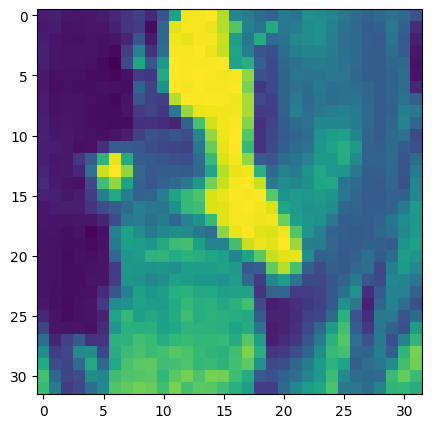

In [9]:
patch_size = 32
img = original_img

query_img = img[30:30+32, 30:30+32,0]
plt.figure(figsize=(5,5))
plt.imshow(query_img)

In [10]:
#-----------------------------------
# hypers 
img_size = img.shape[0]
patch_size = patch_size
channel = 0

#-----------------------------------
tmp_ = []
for i in range(0, img_size,patch_size):
    for k in range(0,img_size,patch_size ):
        slice = img[i:i+patch_size, k:k+patch_size,channel]
        tmp_.append(slice)


In [11]:
len(tmp_)

9

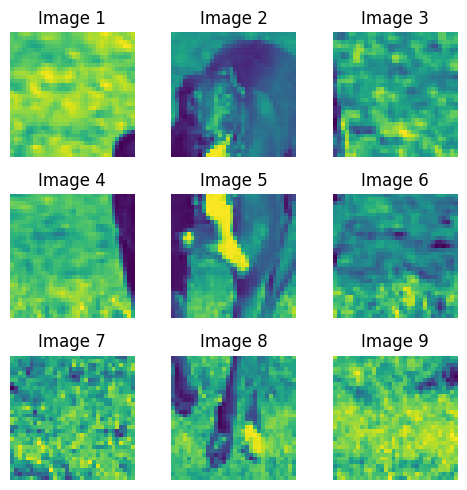

In [12]:
# Assuming tmp_ is a list of pictures (e.g., numpy arrays)
n = len(tmp_)
rows = int(n ** 0.5)  # Number of rows in the grid
cols = (n + rows - 1) // rows  # Number of columns in the grid

fig, axes = plt.subplots(rows, cols, figsize=(5, 5)) 

for i, ax in enumerate(axes.flat):
    if i < n:
        ax.imshow(tmp_[i])
        ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [13]:
#-----------------------------------
# hypers 
img_size = img.shape[0]
patch_size = patch_size
channel = 0

#-----------------------------------
query_img = img[0:0+patch_size, 0:0+patch_size,channel]

tmp_ = []
for i in range(0, img_size,patch_size):
    for k in range(0,img_size,patch_size ):
        slice = img[i:i+patch_size, k:k+patch_size,channel]
        
        # attention score
        # query(d,d)
        # slice(d,d)
        # dot product 로 cosine similarity 로 접근.. 전처리랑 dimension reduction 을 좀 해야되려나. 

        corr = query_img * slice 
        tmp_.append(corr)

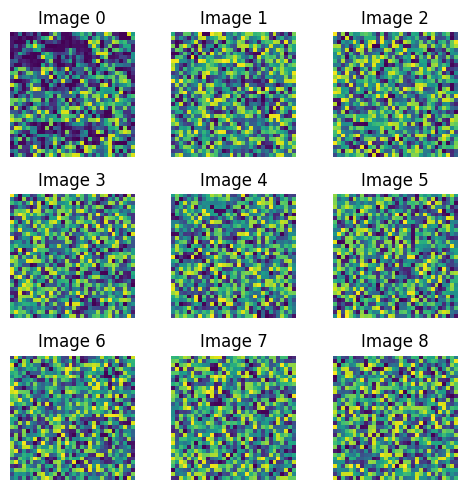

In [14]:
# Assuming tmp_ is a list of pictures (e.g., numpy arrays)
n = len(tmp_)
rows = int(n ** 0.5)  # Number of rows in the grid
cols = (n + rows - 1) // rows  # Number of columns in the grid

fig, axes = plt.subplots(rows, cols, figsize=(5, 5)) 

for i, ax in enumerate(axes.flat):
    if i < n:
        ax.imshow(tmp_[i])
        ax.set_title(f'Image {i}')
    ax.axis('off')

plt.tight_layout()
plt.show()


In [15]:
[np.sum(i) for i in tmp_]

[91038, 129379, 131267, 127769, 126496, 127017, 126456, 132258, 131698]